# ***TASK 1: Data Collection and Web Scraping***

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Fetch webpage
url = "http://quotes.toscrape.com/"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Step 2: Extract quotes, authors, and tags
quotes_data = []
for quote in soup.find_all("div", class_="quote"):
    text = quote.find("span", class_="text").get_text()
    author = quote.find("small", class_="author").get_text()
    tags = [tag.get_text() for tag in quote.find_all("a", class_="tag")]
    quotes_data.append([text, author, ", ".join(tags)])

# Step 3: Store in DataFrame
df_quotes = pd.DataFrame(quotes_data, columns=["Quote", "Author", "Tags"])

# Step 4: Save to CSV
df_quotes.to_csv("quotes_dataset.csv", index=False)

print("Scraped", len(df_quotes), "quotes")
print(df_quotes.head())

Scraped 10 quotes
                                               Quote           Author  \
0  “The world as we have created it is a process ...  Albert Einstein   
1  “It is our choices, Harry, that show what we t...     J.K. Rowling   
2  “There are only two ways to live your life. On...  Albert Einstein   
3  “The person, be it gentleman or lady, who has ...      Jane Austen   
4  “Imperfection is beauty, madness is genius and...   Marilyn Monroe   

                                           Tags  
0        change, deep-thoughts, thinking, world  
1                            abilities, choices  
2  inspirational, life, live, miracle, miracles  
3              aliteracy, books, classic, humor  
4                    be-yourself, inspirational  


# ***TASK 2: Data Cleaning and Preprocessing***

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# Downloading stopwords
nltk.download("stopwords")

# Load the scraped dataset
df = pd.read_csv("quotes_dataset.csv")

# Step 1: Remove duplicates
df = df.drop_duplicates()

# Step 2: Handle missing values
df = df.dropna()

# Step 3: Normalize text (lowercase, remove punctuation/symbols)
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)  # keep only letters and spaces
    return text

df["Cleaned_Quote"] = df["Quote"].apply(clean_text)

# Step 4: Remove stopwords
stop_words = set(stopwords.words("english"))
df["Tokens"] = df["Cleaned_Quote"].apply(
    lambda x: [word for word in x.split() if word not in stop_words]
)

# Save cleaned dataset
df.to_csv("quotes_dataset_cleaned.csv", index=False)

print("Data cleaned successfully ✅")
print(df.head())


Data cleaned successfully ✅
                                               Quote           Author  \
0  “The world as we have created it is a process ...  Albert Einstein   
1  “It is our choices, Harry, that show what we t...     J.K. Rowling   
2  “There are only two ways to live your life. On...  Albert Einstein   
3  “The person, be it gentleman or lady, who has ...      Jane Austen   
4  “Imperfection is beauty, madness is genius and...   Marilyn Monroe   

                                           Tags  \
0        change, deep-thoughts, thinking, world   
1                            abilities, choices   
2  inspirational, life, live, miracle, miracles   
3              aliteracy, books, classic, humor   
4                    be-yourself, inspirational   

                                       Cleaned_Quote  \
0  the world as we have created it is a process o...   
1  it is our choices harry that show what we trul...   
2  there are only two ways to live your life one ...   
3 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# ***TASK 3: Exploratory Data Analysis (EDA)***

📊 Summary of Quotes:
       Quote_Length  Token_Count
count     10.000000    10.000000
mean      84.000000     7.600000
std       26.166136     2.319004
min       45.000000     3.000000
25%       67.000000     6.000000
50%       79.500000     8.500000
75%      104.000000     9.000000
max      126.000000    11.000000

👩‍🎓 Top 5 Authors with Most Quotes:
Author
Albert Einstein    3
J.K. Rowling       1
Jane Austen        1
Marilyn Monroe     1
André Gide         1
Name: count, dtype: int64


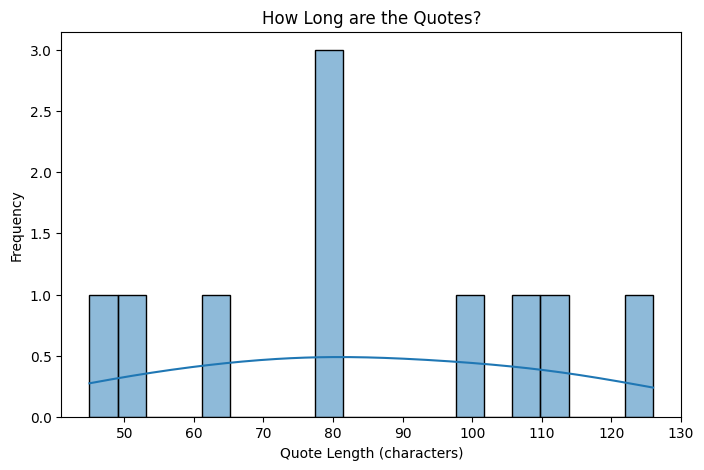

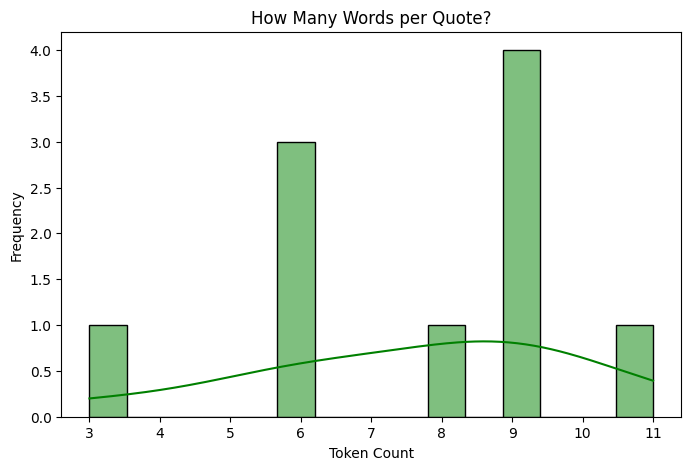

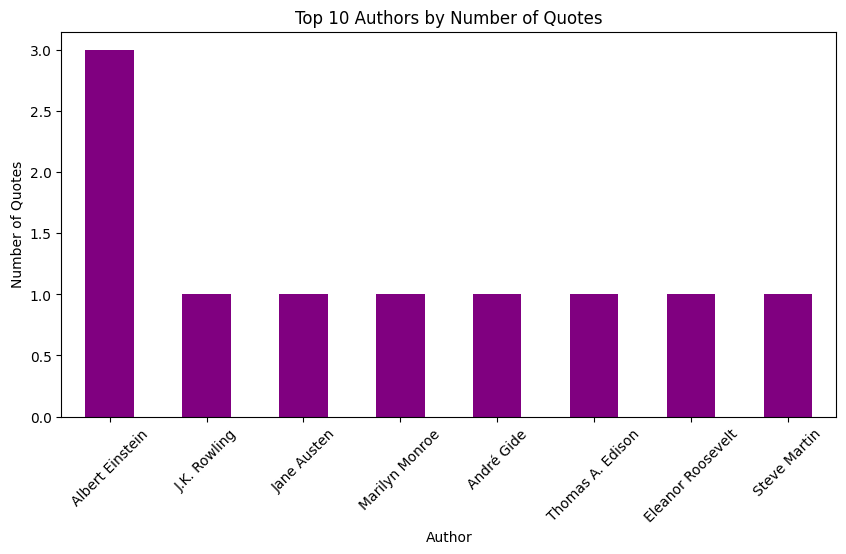

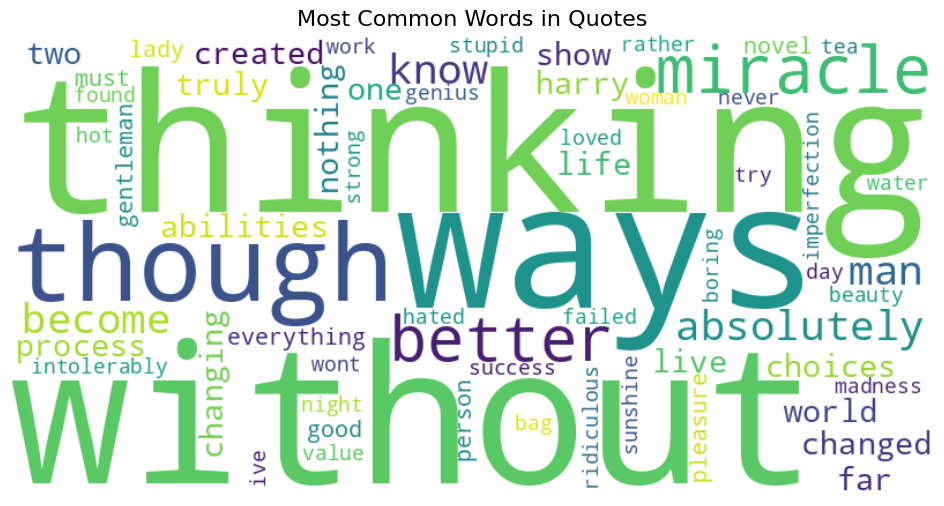

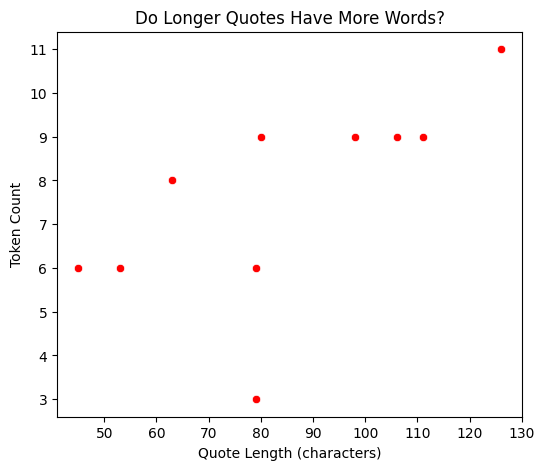

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Step 1: Load the cleaned dataset
df = pd.read_csv("quotes_dataset_cleaned.csv")

# Step 2: Add some helper columns
# Quote_Length → number of characters
# Token_Count → number of words/tokens
df['Quote_Length'] = df['Cleaned_Quote'].apply(len)
df['Token_Count'] = df['Tokens'].apply(lambda x: len(eval(x)))  # convert list stored as string

# Step 3: Quick summary
print("📊 Summary of Quotes:")
print(df[['Quote_Length', 'Token_Count']].describe())

print("\n👩‍🎓 Top 5 Authors with Most Quotes:")
print(df['Author'].value_counts().head())

# Step 4: Visualizations

# Distribution of Quote Lengths
plt.figure(figsize=(8,5))
sns.histplot(df['Quote_Length'], bins=20, kde=True)
plt.title("How Long are the Quotes?")
plt.xlabel("Quote Length (characters)")
plt.ylabel("Frequency")
plt.show()

# Distribution of Token Counts
plt.figure(figsize=(8,5))
sns.histplot(df['Token_Count'], bins=15, kde=True, color="green")
plt.title("How Many Words per Quote?")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.show()

# Top 10 Authors with most quotes
plt.figure(figsize=(10,5))
df['Author'].value_counts().head(10).plot(kind='bar', color="purple")
plt.title("Top 10 Authors by Number of Quotes")
plt.xlabel("Author")
plt.ylabel("Number of Quotes")
plt.xticks(rotation=45)
plt.show()

# Step 5: Word Cloud (most common words across all quotes)
all_words = ' '.join(df['Cleaned_Quote'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Quotes", fontsize=16)
plt.show()

# Step 6: Relationship between length & tokens
plt.figure(figsize=(6,5))
sns.scatterplot(x="Quote_Length", y="Token_Count", data=df, color="red")
plt.title("Do Longer Quotes Have More Words?")
plt.xlabel("Quote Length (characters)")
plt.ylabel("Token Count")
plt.show()
